# Exercise 4.10 Pt 1.2 - Gerardo Pérez

In [3]:
# 1. Importing libraries and dataframes:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
path = r'C:\Users\geram\OneDrive\Escritorio\Data Analysis\Instacart Basket Analysis'

In [6]:
path

'C:\\Users\\geram\\OneDrive\\Escritorio\\Data Analysis\\Instacart Basket Analysis'

In [7]:
final_OPC_1 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers_sample.pkl'))

In [9]:
depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [11]:
final_OPC_1.head()

,order_id,user_id,order_number,orders_day_of_week,order_by_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,state,age,date_joined,n_dependants,marital_status,income,region,spending_flag,max_order,exclusion_flag
0,2.0,202279,3,5,9,8.0,33120.0,1,1,33122.0,...,Idaho,57,2/6/2020,3,married,98119,West,middle income,8,High-activity customer
1,2.0,202279,3,5,9,8.0,28985.0,2,1,28987.0,...,Idaho,57,2/6/2020,3,married,98119,West,middle income,8,High-activity customer
2,2.0,202279,3,5,9,8.0,9327.0,3,0,9327.0,...,Idaho,57,2/6/2020,3,married,98119,West,middle income,8,High-activity customer
3,2.0,202279,3,5,9,8.0,45918.0,4,1,45922.0,...,Idaho,57,2/6/2020,3,married,98119,West,middle income,8,High-activity customer
4,2.0,202279,3,5,9,8.0,30035.0,5,0,30037.0,...,Idaho,57,2/6/2020,3,married,98119,West,middle income,8,High-activity customer


In [13]:
depts.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [15]:
depts.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [19]:
final_OPC_depts = final_OPC_1.merge(depts, on='department_id', indicator='created')

In [21]:
final_OPC_depts.head()

,order_id,user_id,order_number,orders_day_of_week,order_by_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,date_joined,n_dependants,marital_status,income,region,spending_flag,max_order,exclusion_flag,department,created
0,2.0,202279,3,5,9,8.0,33120.0,1,1,33122.0,...,2/6/2020,3,married,98119,West,middle income,8,High-activity customer,dairy eggs,both
1,2.0,202279,3,5,9,8.0,28985.0,2,1,28987.0,...,2/6/2020,3,married,98119,West,middle income,8,High-activity customer,produce,both
2,2.0,202279,3,5,9,8.0,9327.0,3,0,9327.0,...,2/6/2020,3,married,98119,West,middle income,8,High-activity customer,pantry,both
3,2.0,202279,3,5,9,8.0,45918.0,4,1,45922.0,...,2/6/2020,3,married,98119,West,middle income,8,High-activity customer,pantry,both
4,2.0,202279,3,5,9,8.0,30035.0,5,0,30037.0,...,2/6/2020,3,married,98119,West,middle income,8,High-activity customer,pantry,both


# 5. Exploring the relationships from the profiles created:

AttributeError: module 'matplotlib.pyplot' has no attribute 'legeng'

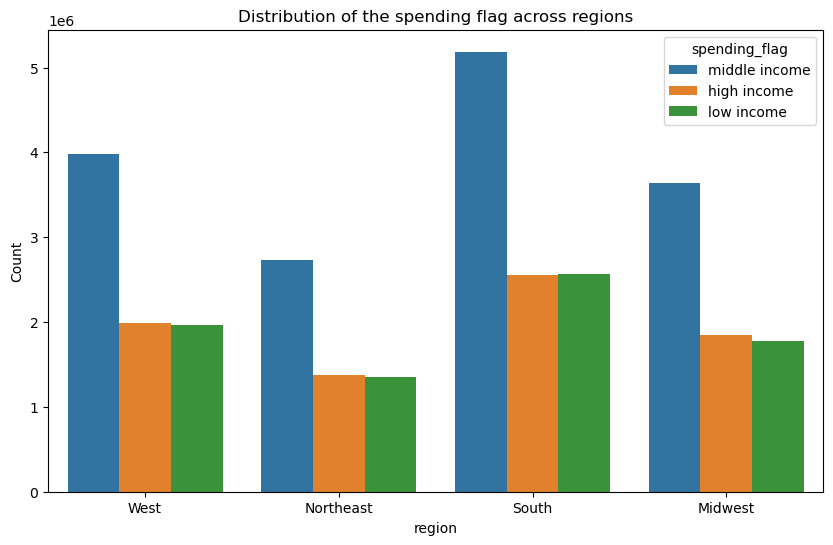

In [70]:
# Bar plot: Region vs Spending Flag
plt.figure(figsize=(10,6))
sns.countplot(data=final_OPC_depts, x="region", hue="spending_flag")
plt.title("Distribution of the spending flag across regions")
plt.xlabel("region")
plt.ylabel("Count")
plt.legeng(title="spending_flag")
plt.xticks(rotation=45)

plt.show()

In [ ]:
# Most customers in all regions belong to the "middle income" category, with the South region showing the biggest amount of customers belonging to this categiry

In [ ]:
# Region vs Marital Status

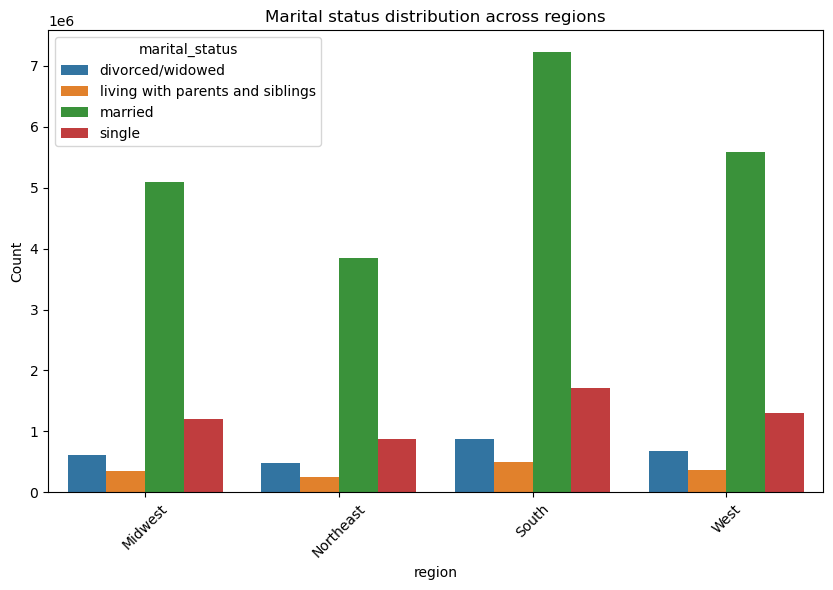

In [29]:
# Example grouped  bar plot:
region_marital = final_OPC_depts.groupby(["region", "marital_status"]).size().reset_index(name="Count")

plt.figure(figsize=(10,6))
sns.barplot(data=region_marital, x="region", y="Count", hue="marital_status", dodge=True)
plt.title("Marital status distribution across regions")
plt.xlabel("region")
plt.ylabel("Count")
plt.legend(title="marital_status")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Most customers belong to the "married" category in all regions, with the South reporting the majority of married customers
# The marital_status trend after married follows single customers, divorced/widowed and in last place the living with parents and siblings category

In [ ]:
# Spending flag vs Department

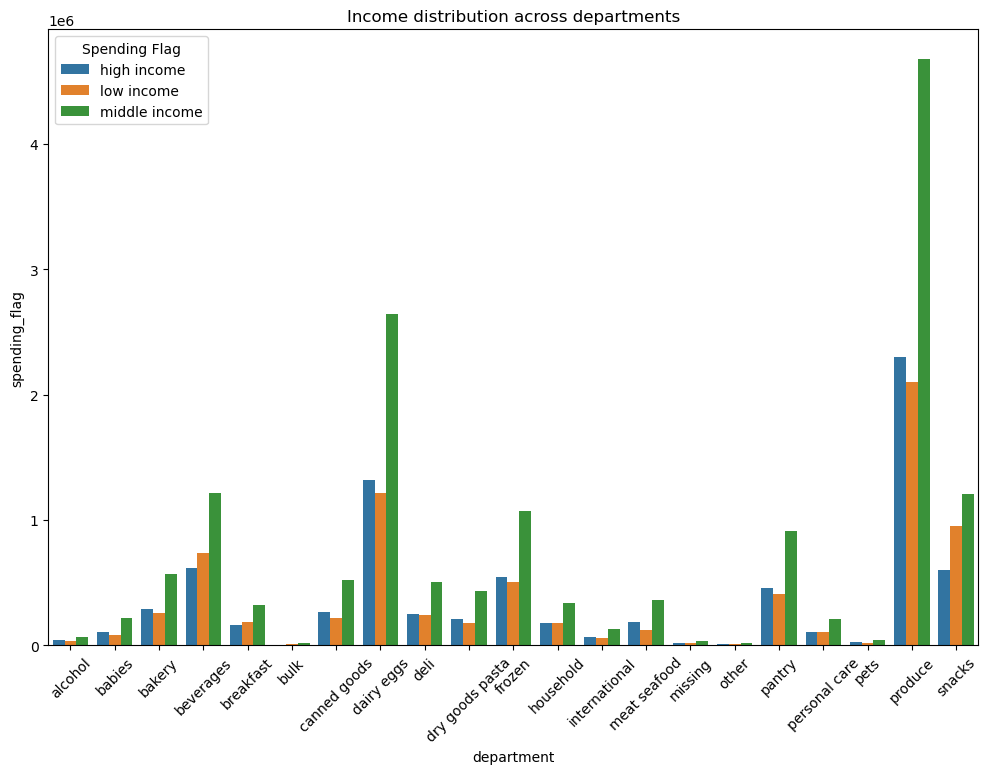

In [35]:
# Bar Plot
spending_dept = final_OPC_depts.groupby(["spending_flag", "department"]).size().reset_index(name="Count")

plt.figure(figsize=(12, 8))
sns.barplot(data=spending_dept, x="department", y="Count", hue="spending_flag")
plt.title("Income distribution across departments")
plt.xlabel("department")
plt.ylabel("spending_flag")
plt.legend(title="Spending Flag")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Most middle income customers focus on the "produce" department
# "dairy eggss" comes in second position as the department category most consumed by middle income customers
# "beverages", "frozen" and "snacks" follow as the most adquired departments by customers

In [ ]:
# Marital Status vs Department

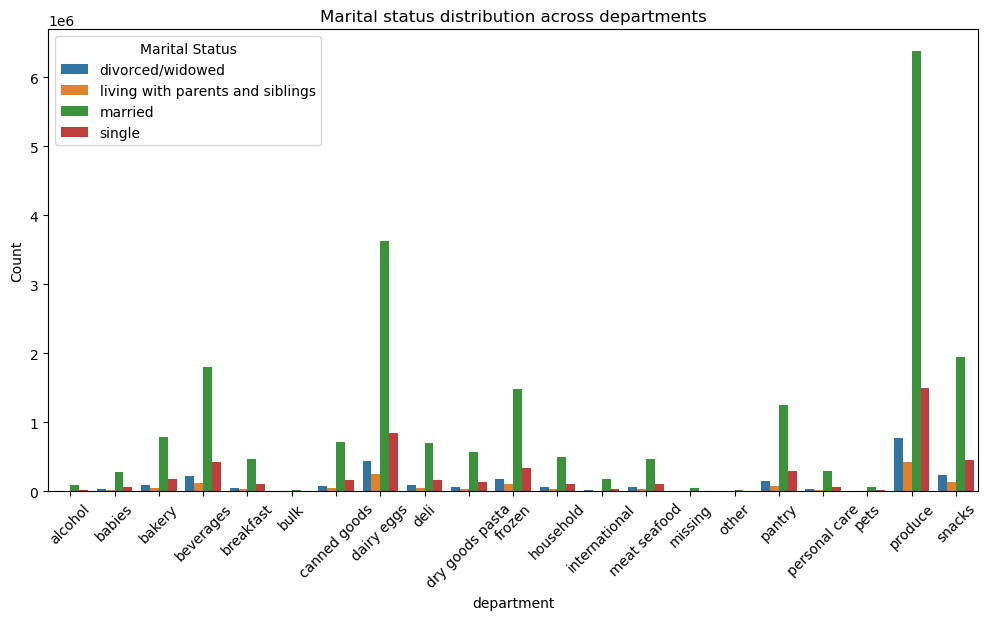

In [37]:
marital_dept = final_OPC_depts.groupby(["marital_status", "department"]).size().reset_index(name="Count")

plt.figure(figsize=(12, 6))
sns.barplot(data=marital_dept, x="department", y="Count", hue="marital_status")
plt.title("Marital status distribution across departments")
plt.xlabel("department")
plt.ylabel("Count")
plt.legend(title="Marital Status")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Departments "produce", followed by "dairy eggs", "beverages" and "snacks" are the most sold items from the department variable
# Married customers also dominate considerably as the customers adquiring these products

In [ ]:
# Regions vs Departments

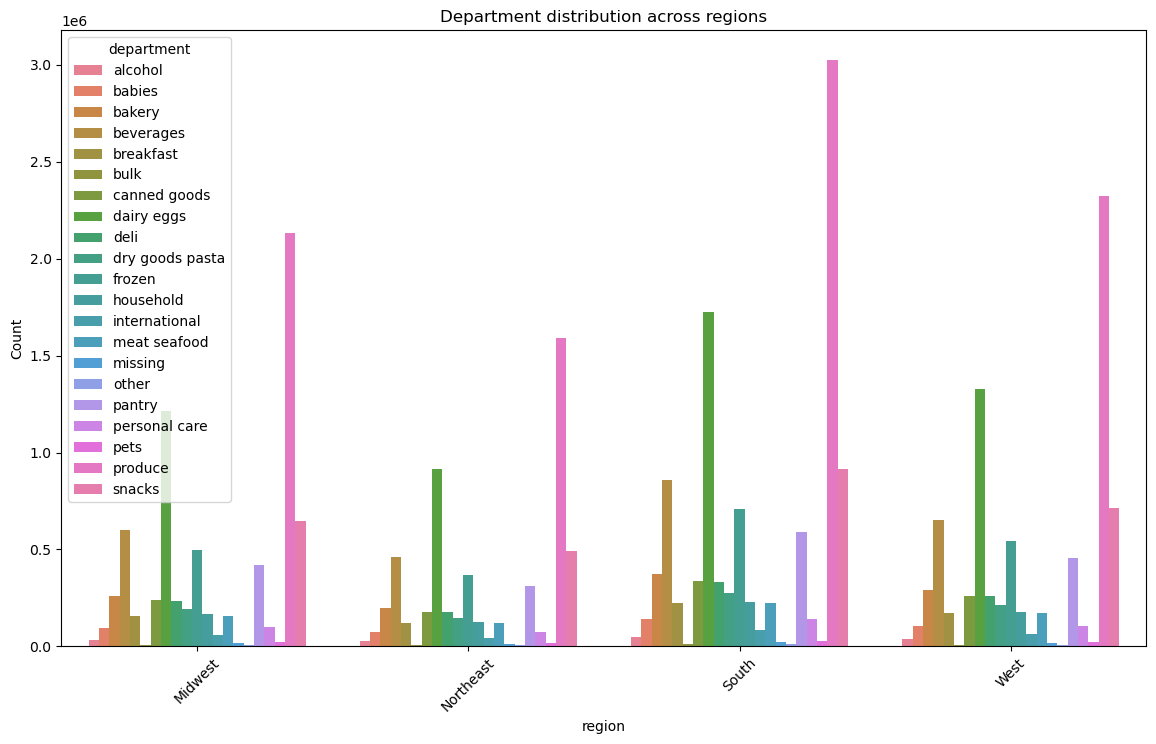

In [41]:
region_dept = final_OPC_depts.groupby(["region", "department"]).size().reset_index(name="Count")

plt.figure(figsize=(14, 8))
sns.barplot(data=region_dept, x="region", y="Count", hue="department")
plt.title("Department distribution across regions")
plt.xlabel("region")
plt.ylabel("Count")
plt.legend(title="department")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Item "produce" from the department column is the most bought item in the South region
# The West and Midwest regions follow in terms of department distribution across regions, with the Northeast region reporting the least amount of orders

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [51]:
customer_profile = final_OPC_depts.groupby("user_id").agg({
  "order_number": ["max", "mean", "min"],
    "days_since_prior_order": ["max", "mean", "min"],
    "prices": ["max", "mean", "min"]
}).reset_index()

In [53]:
print(customer_profile.head())

  user_id order_number                days_since_prior_order                   \
                   max       mean min                    max       mean   min   
0       1           10   5.813559   1                   30.0  20.259260   0.0   
1      10            5   3.223776   1                   30.0  20.746376  12.0   
2     100            5   3.555556   1                   30.0  26.320000  18.0   
3    1000            7   3.980583   1                   30.0  11.647727   5.0   
4   10000           72  35.973443   1                   17.0   4.949580   0.0   

      prices                 
         max      mean  min  
0  14.000000  6.367797  1.0  
1  24.200001  8.651049  1.0  
2  21.600000  9.859260  2.3  
3  15.000000  8.407767  1.2  
4  24.200001  8.045421  1.2  
